In [1]:
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt

import pandas
from BinSpectra import lowres_dataset
import warnings
#warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
PATH = '../Data/DataProducts/'

In [2]:
def loaddata(phase):
    dsname = "dataset{}.pickle".format(phase)
    return snid.loadPickle(PATH + dsname)


def classify_spectra(ph, dphase=5):
    warnings.filterwarnings('ignore')
    exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
    av_svm_score_dict = {}
    max_svm_score_dict = {}
    for i in range(1, 5):
        for j in range(i + 1, 6):
            bin_factor_list = []
            for k in range(2, 82, 10):
                datain = loaddata(phase)
                dataset_lowres = lowres_dataset(datain, k)
                snidPCA = SNePCA.SNePCA(dataset_lowres, ph - dphase, ph+phase)
                snidPCA.snidPCA()
                snidPCA.calcPCACoeffs()
                svmsc,av,std=snidPCA.runSVM(i,j,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True,excludeSNe=exclude,std_rad=1.0,svm=True,count=3,fig=None,ax=None,ncv=50,markOutliers=True)
                av_svm_score_dict.setdefault('PC%d vs PC%d'%(i, j), []).append(av)
                max_svm_score_dict.setdefault('PC%d vs PC%d'%(i, j), []).append(max(svmsc))
                bin_factor_list.append(k)
    return np.array(bin_factor_list), av_svm_score_dict, max_svm_score_dict

In [3]:
phase = 0
svm_score = classify_spectra(phase)

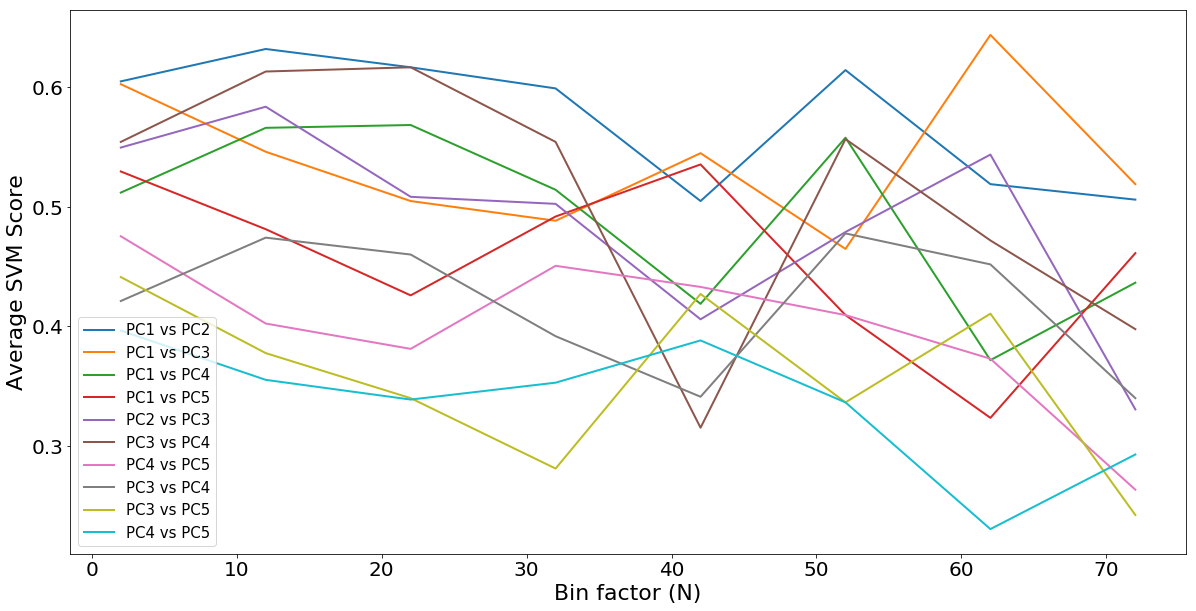

In [4]:
plt.figure(figsize=(20,10))
plt.plot(svm_score[0], svm_score[1]['PC1 vs PC2'], label = 'PC1 vs PC2', linewidth=2)
plt.plot(svm_score[0], svm_score[1]['PC1 vs PC3'], label = 'PC1 vs PC3', linewidth=2)
plt.plot(svm_score[0], svm_score[1]['PC1 vs PC4'], label = 'PC1 vs PC4', linewidth=2)
plt.plot(svm_score[0], svm_score[1]['PC1 vs PC5'], label = 'PC1 vs PC5', linewidth=2)
plt.plot(svm_score[0], svm_score[1]['PC2 vs PC3'], label = 'PC2 vs PC3', linewidth=2)
plt.plot(svm_score[0], svm_score[1]['PC2 vs PC4'], label = 'PC3 vs PC4', linewidth=2)
plt.plot(svm_score[0], svm_score[1]['PC2 vs PC5'], label = 'PC4 vs PC5', linewidth=2)
plt.plot(svm_score[0], svm_score[1]['PC3 vs PC4'], label = 'PC3 vs PC4', linewidth=2)
plt.plot(svm_score[0], svm_score[1]['PC3 vs PC5'], label = 'PC3 vs PC5', linewidth=2)
plt.plot(svm_score[0], svm_score[1]['PC4 vs PC5'], label = 'PC4 vs PC5', linewidth=2)
plt.xlabel('Bin factor (N)', fontsize=22)
plt.ylabel('Average SVM Score', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=15)

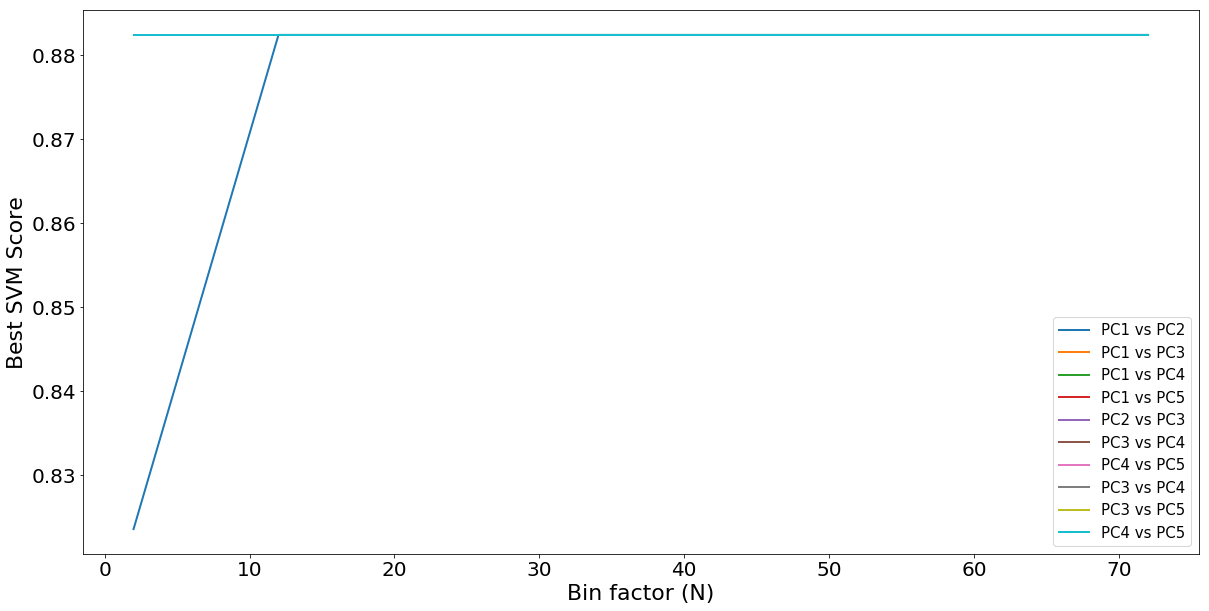

In [5]:
plt.figure(figsize=(20,10))
plt.plot(svm_score[0], svm_score[2]['PC1 vs PC2'], label = 'PC1 vs PC2', linewidth=2)
plt.plot(svm_score[0], svm_score[2]['PC1 vs PC3'], label = 'PC1 vs PC3', linewidth=2)
plt.plot(svm_score[0], svm_score[2]['PC1 vs PC4'], label = 'PC1 vs PC4', linewidth=2)
plt.plot(svm_score[0], svm_score[2]['PC1 vs PC5'], label = 'PC1 vs PC5', linewidth=2)
plt.plot(svm_score[0], svm_score[2]['PC2 vs PC3'], label = 'PC2 vs PC3', linewidth=2)
plt.plot(svm_score[0], svm_score[2]['PC2 vs PC4'], label = 'PC3 vs PC4', linewidth=2)
plt.plot(svm_score[0], svm_score[2]['PC2 vs PC5'], label = 'PC4 vs PC5', linewidth=2)
plt.plot(svm_score[0], svm_score[2]['PC3 vs PC4'], label = 'PC3 vs PC4', linewidth=2)
plt.plot(svm_score[0], svm_score[2]['PC3 vs PC5'], label = 'PC3 vs PC5', linewidth=2)
plt.plot(svm_score[0], svm_score[2]['PC4 vs PC5'], label = 'PC4 vs PC5', linewidth=2)
plt.xlabel('Bin factor (N)', fontsize=22)
plt.ylabel('Best SVM Score', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=15)